In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df='D:/Mish mash/Test dataset v2.xlsx'

In [3]:
df=pd.read_excel(df)

In [4]:
df.head()

,Period,First_Day_Period,PERIOD,EQ
0,2016 - Period:1,2016-01-01,2016-01-28,504.784933
1,2016 - Period:2,2016-01-29,2016-02-25,490.226477
2,2016 - Period:3,2016-02-26,2016-03-24,479.244686
3,2016 - Period:4,2016-03-25,2016-04-21,489.057428
4,2016 - Period:5,2016-04-22,2016-05-19,477.031994


In [5]:
df.drop(['Period','First_Day_Period'],axis=1,inplace=True)

In [6]:
df.head()

,PERIOD,EQ
0,2016-01-28,504.784933
1,2016-02-25,490.226477
2,2016-03-24,479.244686
3,2016-04-21,489.057428
4,2016-05-19,477.031994


In [7]:
df.dtypes

PERIOD    datetime64[ns]
EQ               float64
dtype: object

In [8]:
df.set_index("PERIOD",inplace=True)

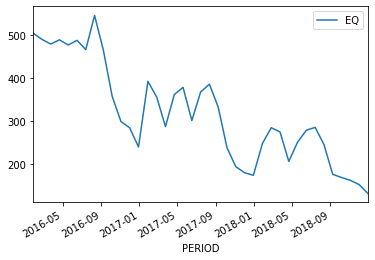

In [9]:
df.plot()

In [10]:
df_base=pd.concat([df,df.shift(1)],axis=1)

In [11]:
df_base.head()

,EQ,EQ
PERIOD,,
2016-01-28,504.784933,NaN
2016-02-25,490.226477,504.784933
2016-03-24,479.244686,490.226477
2016-04-21,489.057428,479.244686
2016-05-19,477.031994,489.057428


In [12]:
df_base.columns=['Actual_sales','Forecast_sales']

In [13]:
df_base

,Actual_sales,Forecast_sales
PERIOD,,
2016-01-28,504.784933,NaN
2016-02-25,490.226477,504.784933
2016-03-24,479.244686,490.226477
2016-04-21,489.057428,479.244686
2016-05-19,477.031994,489.057428
2016-06-16,487.855299,477.031994
2016-07-14,466.399281,487.855299
2016-08-11,546.053084,466.399281
2016-09-08,464.925607,546.053084


In [14]:
df_base.dropna(inplace=True)

In [15]:
df_base.head()

,Actual_sales,Forecast_sales
PERIOD,,
2016-02-25,490.226477,504.784933
2016-03-24,479.244686,490.226477
2016-04-21,489.057428,479.244686
2016-05-19,477.031994,489.057428
2016-06-16,487.855299,477.031994


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
df_error=mean_squared_error(df_base.Actual_sales,df_base.Forecast_sales)

In [18]:
df_error

2973.563071581233

In [19]:
np.sqrt(df_error)

54.53038668101697

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

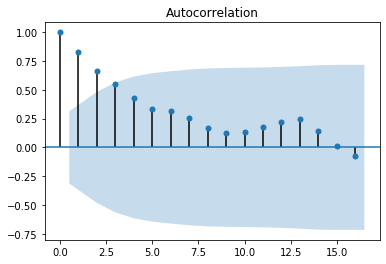

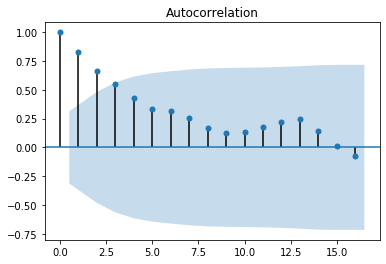

In [21]:
plot_acf(df)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


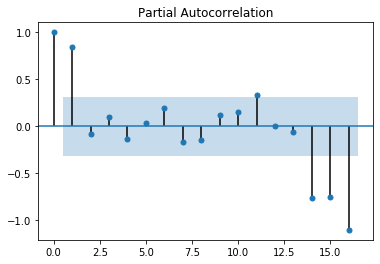

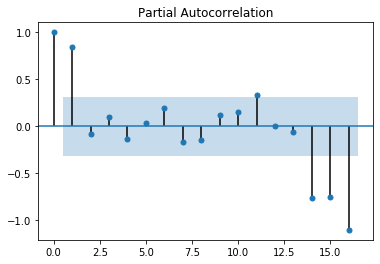

In [22]:
# Q-0,p-1,d-0-1
plot_pacf(df)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
df_train=df[0:25]
df_test=df[25:40]

In [25]:
df_model=ARIMA(df_train,order=(2,0,1))

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
df_model_fit= df_model.fit()

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
df_model_fit.aic

287.0809771774834

In [28]:
df_forecast=df_model_fit.forecast(steps=14)[0]

In [29]:
df_forecast=pd.DataFrame(df_forecast)

In [30]:
df_forecast

,0
0,205.621663
1,228.170386
2,247.480005
3,264.017291
4,278.178799
5,290.307313
6,300.693209
7,309.588343
8,317.205216
9,323.728997


In [31]:
df_test

,EQ
PERIOD,
2017-12-30,173.237305
2018-01-28,247.315476
2018-02-25,284.183292
2018-03-25,274.430757
2018-04-22,205.499984
2018-05-20,250.555064
2018-06-17,278.317524
2018-07-15,284.895480
2018-08-12,244.931359


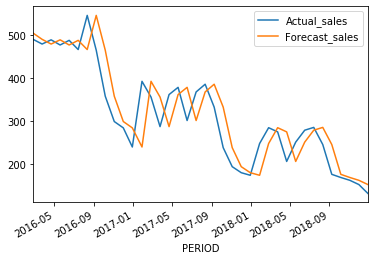

In [32]:
df_base.plot()

In [33]:
np.sqrt(mean_squared_error(df_test,df_forecast))

111.17988515793068

In [34]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train,test=df[0:25],df[25:40]
            predictions=list()
            for i in range(len(test)):
                try:
                    model= ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('ARIMA%s RMSE=%.2f'% (order,error))
                except:
                    continue

ARIMA(0, 0, 0) RMSE=27729.26
ARIMA(0, 0, 1) RMSE=7932.85
ARIMA(0, 0, 2) RMSE=4558.47
ARIMA(0, 1, 0) RMSE=5429.41
ARIMA(0, 1, 1) RMSE=5342.93
ARIMA(0, 1, 2) RMSE=3002.96
ARIMA(0, 1, 3) RMSE=3134.31
ARIMA(0, 1, 4) RMSE=2961.43
ARIMA(0, 2, 0) RMSE=5472.45
ARIMA(0, 2, 1) RMSE=6433.53
ARIMA(1, 0, 0) RMSE=2965.59
ARIMA(1, 0, 1) RMSE=2892.05
ARIMA(1, 0, 2) RMSE=4508.15
ARIMA(1, 0, 3) RMSE=33652.78
ARIMA(1, 0, 4) RMSE=3097.05
ARIMA(1, 1, 0) RMSE=5425.79
ARIMA(1, 2, 0) RMSE=6927.95
ARIMA(1, 2, 1) RMSE=6476.17
ARIMA(1, 2, 2) RMSE=6379.47
ARIMA(2, 0, 0) RMSE=2918.45
ARIMA(2, 0, 1) RMSE=2970.11
ARIMA(2, 0, 2) RMSE=5048.29
ARIMA(2, 0, 3) RMSE=7464.67
ARIMA(2, 1, 0) RMSE=4667.34
ARIMA(2, 1, 1) RMSE=5126.44
ARIMA(2, 2, 0) RMSE=12837.45
ARIMA(2, 2, 1) RMSE=5764.82
ARIMA(2, 2, 2) RMSE=6299.95
ARIMA(3, 0, 0) RMSE=2923.19
ARIMA(3, 0, 1) RMSE=3002.83
ARIMA(3, 1, 0) RMSE=5505.79
ARIMA(3, 1, 1) RMSE=5490.25
ARIMA(3, 1, 2) RMSE=3378.00
ARIMA(3, 2, 0) RMSE=13433.02
ARIMA(3, 2, 1) RMSE=7518.65
ARIMA(3, 2, 2) R

In [67]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
mean_absolute_percentage_error(df_test,df_forecast)

56.196680870065705

In [36]:
train=df[0:]

In [37]:
df_model1=ARIMA(df_train,order=(1,0,1))

In [38]:
df_model_fit1= df_model1.fit()

In [39]:
df_future=df_model_fit1.forecast(steps=6)[0]

In [40]:
df_future

array([210.15237821, 240.81657893, 265.45404288, 285.24926386,
       301.15393549, 313.93270568])

In [41]:
pd.DataFrame(df_future).to_csv("Future_sales.csv",index=False)